# Lab 5: Modeling, Loss Functions, and Linear Regression


<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Predicting Restaurant Tips

In this lab, you will try to predict restaurant tips from a set of data in several ways:

A. Without given any additional information, use a **constant model with L2 loss** to predict the tip $\hat{y}$ as a summary statistic, $\theta$.

B. Given one piece of information—the total bill $x$—**use a linear model with L2 loss** to predict the tip $\hat{y}$ as a linear function of $x$.

C. See if a **constant model with L1 loss** changes our predictions.

First, let's load in the data.

In [101]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [102]:
# just run this cell
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [103]:
tips = pd.read_csv("tips.csv")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Quick EDA**: Note that this dataset is likely from the United States. The below plot graphs the distribution of tips in this dataset, both in absolute amounts ($) and as a fraction of the total bill (post-tax, but pre-tip).

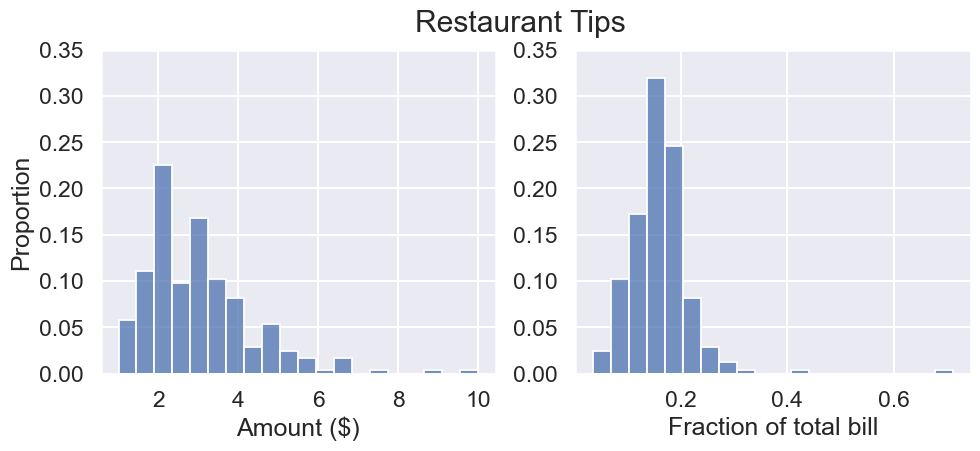

In [104]:
# just run this cell
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
sns.histplot(tips['tip'], bins=20, stat="proportion", ax=ax[0])
sns.histplot(tips['tip']/tips['total_bill'], bins=20, stat="proportion", ax=ax[1])
ax[0].set_xlabel("Amount ($)")
ax[1].set_xlabel("Fraction of total bill")
ax[0].set_ylim((0, 0.35))
ax[1].set_ylim((0, 0.35))
ax[1].set_ylabel("") # for cleaner visualization
fig.suptitle("Restaurant Tips")
plt.show()

In this lab we'll estimate the tip in **absolute amounts ($)**. The above plot is just to confirm your expectations about the `tips` dataset.

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part B: Tips as a Linear Function of Total Bill

In this section, you will follow the exact same modeling process but instead use total bill to predict tip.

We'll save the observed total bill values (post-tax but pre-tip) and the observed tip values in two NumPy arrays, `x_total_bills` and `y_tips`: 

In [105]:
# just run this cell
x_total_bills = np.array(tips['total_bill']) # array of total bill amounts
y_tips = np.array(tips['tip'])              # array of observed tips
print("total bills", x_total_bills.shape)
print("tips", y_tips.shape)

total bills (244,)
tips (244,)


<br/>
<hr style="border: 1px solid #fdb515;" />

## B.1 Define the model

We will define our model as the **linear model** that takes a single input feature, `total_bill` ($x$):

$$\Large
\hat{y} = a + b x
$$

Our "parameter" $\theta$ is actually two parameters: $a$ and $b$. You may see this written as $\theta = (a, b)$.

Our modeling task is then to pick the best values $a = \hat{a}$ and $b = \hat{b}$ from our data. Then, given the total bill $x$, we can predict the tip as $\hat{y} = \hat{a} + \hat{b} x$.

No code to write here!





<br/>
<hr style="border: 1px solid #fdb515;" />

## B.2: Define the loss function and risk

Next, we'll define our loss function $L(y, \hat{y})$ and consequently our risk function $R(\theta) = R(a, b)$.

Similar to our approach to Part A, we'll use L2 Loss and Mean Squared Error. Let the dataset $\mathcal{D}$ be the set of observations: $\mathcal{D} = \{(x_1, y_1), \ldots, (x_n, y_n)\}$, where $(x_i, y_i)$ are the $i^{th}$ total bill and tip, respectively, in our dataset.

Our L2 Loss and Mean Squared Error are therefore:

\begin{align}
\large L_2(y, \hat{y}) = \large (y - \hat{y})^2 &= \large (y - (a + bx))^2 \\
\large R(a, b) = \large \frac{1}{n} \sum_{i=1}^n L(y_i, \hat{y_i}) &= \large  \frac{1}{n} \sum_{i = 1}^n(y_i - (a + b x_i))^2
\end{align}

Notice that because our model is now the linear model $\hat{y} = a + bx$, our final expressions for Loss and MSE are different from Part A.

---

## Question 4

Define the `mse_tips_linear` function which computes $R(a, b)$ as the **mean squared error** on the tips data for a linear model with parameters $a$ and $b$.

Notes:
* This function takes in two parameters `a` and `b`.
* You should use the NumPy arrays `x_total_bills` and `y_tips` defined at the beginning of Part B.
* We've included some skeleton code, but feel free to write your own as well.

<!--
BEGIN QUESTION
name: q4
-->

In [106]:
def mse_tips_linear(a, b):
    """
    Returns average L2 loss between
    predicted y_hat values (using x_total_bills and parameters a, b)
    and actual y values (y_tips)
    """
    y_hats = a + x_total_bills * b
    y = (y_tips - y_hats) ** 2
    return np.mean(y)

mse_tips_linear(5, 0) # arbitrarily pick a = 0.9, b = 0.1

5.913496721311476


<br/>
<hr style="border: 1px solid #fdb515;" />

## B.3: Find the $\theta$ that minimizes risk

Similar to before, we'd like to try out different approaches to finding the optimal parameters $\hat{a}$ and $\hat{b}$ that minimize MSE.


<br/>

---

## Question 5: Analytical Solution

In lecture, we derived the following expression for the line of best fit:

$$\Large \hat{y_i} = \bar{y} + r \frac{SD(y)}{SD(x)} (x_i - \bar{x})$$

where $\bar{x}$, $\bar{y}$, $SD(x)$, $SD(y)$ correspond to the means and standard deviations of $x$ and $y$, respectively, and $r$ is the correlation coefficient.

### Question 5a

Assign `x_bar`, `y_bar`, `std_x`, `std_y`, and `r`, for our dataset. Note: Make sure to use `np.std`, and not `<Series name>.std()`.

- Hint: Remember, in our case, `y` is `y_tips`, and `x` is `x_total_bills`.
- Hint: You may find `np.corrcoef` ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)) handy in computing `r`. Note that the output of `np.corrcoef` is a matrix, not a number, so you'll need to collect the correlation coefficient by indexing into the returned matrix.

<!--
BEGIN QUESTION
name: q5a
-->

In [107]:
x_bar = np.mean(x_total_bills)
y_bar = np.mean(y_tips)
std_x = np.std(x_total_bills)
std_y = np.std(y_tips)
r = np.corrcoef(x_total_bills, y_tips)[0, 1]

### Question 5b

Now, set `b_hat` and `a_hat` correctly, in terms of the variables you defined above. 

Hints:
* Try and match the slope and intercept in $\hat{y_i} = \hat{a} + \hat{b}x_i$ to the slope and intercept in $\hat{y_i} = \bar{y} + r \frac{SD(y)}{SD(x)} (x_i - \bar{x})$.
* You may want to define `a_hat` in terms of `b_hat`.

<!--
BEGIN QUESTION
name: q5b
-->

In [108]:
b_hat = r * (std_y / std_x)
a_hat = y_bar
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---

### Question 5c

Now, use `a_hat` and `b_hat` to implement the `predict_tip_linear` function, which predicts the tip for a total bill amount of `bill`.

<!--
BEGIN QUESTION
name: q5c
-->

In [109]:
def predict_tip_linear(bill):
    return a_hat + b_hat * (bill-x_bar)

# do not edit below this line
bill = 20
print(f"""If you have a ${bill} bill, Part B's modeling process
    predicts that you will pay a tip of ${predict_tip_linear(bill):.2f}.""")

tips.loc[(tips['total_bill'] <= 20.4) & (tips['total_bill'] >= 19.8)]


If you have a $20 bill, Part B's modeling process
    predicts that you will pay a tip of $3.02.


,total_bill,tip,sex,smoker,day,time,size
21,20.29,2.75,Female,No,Sat,Dinner,2
24,19.82,3.18,Male,No,Sat,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
65,20.08,3.15,Male,No,Sat,Dinner,3
68,20.23,2.01,Male,No,Sat,Dinner,2
131,20.27,2.83,Female,No,Thur,Lunch,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2



<br/>

---

## Numerically computing $\hat{\theta}$
The `minimize` function we introduced earlier can also minimize functions of multiple variables (useful for numerically computing $\hat{a}$ and $\hat{b}$. There's one quirk, however, which is that the function has to accept its parameters as a single list.

For example, consider the multivariate $f(u, v) = u^2 - 2 u v - 3 v + 2 v^2$. It turns out this function's minimum is at $(1.5, 1.5)$. To minimize this function, we create `f`.



In [110]:
# just run this cell
def f(theta):
    u = theta[0]
    v = theta[1]
    return u**2 - 2 * u * v - 3 * v + 2 * v**2

minimize(f, x0 = [0.0, 0.0]) 

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -2.2499999999999982
        x: [ 1.500e+00  1.500e+00]
      nit: 3
      jac: [-5.960e-08  0.000e+00]
 hess_inv: [[ 1.000e+00  5.000e-01]
            [ 5.000e-01  5.000e-01]]
     nfev: 12
     njev: 4

---

## Question 6: Numerical Solution

### Question 6a

Implement the `mse_tips_linear_list` function, which is exactly like `mse_tips_linear` defined in Question 4 except that it takes in a single list of 2 variables rather than two separate variables. For example `mse_tips_linear_list([2, 3])` should return the same value as `mse_tips_linear(2, 3)`.

<!--
BEGIN QUESTION
name: q6a
-->

In [111]:
def mse_tips_linear_list(theta):
    """
    Returns average L2 loss between
    predicted y_hat values (using x_total_bills and linear params theta)
    and actual y values (y_tips)
    """

    a = theta[0]
    b = theta[1]
    return mse_tips_linear(a, b)

---
### Question 6b

Now, set `min_scipy_linear` to the result of calling minimize to optimize the risk function you just implemented.

Hint: Make sure to set `x0`, say, to `[0.0, 0.0]`.

<!--
BEGIN QUESTION
name: q6b
-->

In [112]:
# call minimize with initial x0 = [0.0, 0.0]
min_scipy_linear = minimize(mse_tips_linear_list, [0.0, 0.0])
min_scipy_linear

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.0360194420114932
        x: [ 9.203e-01  1.050e-01]
      nit: 3
      jac: [-4.470e-08 -2.980e-08]
 hess_inv: [[ 2.980e+00 -1.253e-01]
            [-1.253e-01  6.335e-03]]
     nfev: 15
     njev: 5

Based on the above output from your call to `minimize`, running the following cell will set and print the values of `a_hat` and `b_hat`.

In [113]:
# just run this cell
a_hat_scipy = min_scipy_linear['x'][0]
b_hat_scipy = min_scipy_linear['x'][1]
a_hat_scipy, b_hat_scipy

(0.9202703450693733, 0.10502447914641161)

<br/>
<br/>

The following cell will print out the values of `a_hat` and `b_hat` computed from both methods ("manual" refers to the analytical solution in Question 5; "scipy" refers to the numerical solution in Question 6). If you've done everything correctly, these should be very close to one another.

In [114]:
# just run this cell
print('a_hat_scipy: ', a_hat_scipy)
print('a_hat_manual: ', a_hat)
print('\n')
print('b_hat_scipy: ', b_hat_scipy)
print('b_hat_manual: ', b_hat)

a_hat_scipy:  0.9202703450693733
a_hat_manual:  2.99827868852459


b_hat_scipy:  0.10502447914641161
b_hat_manual:  0.10502451738435341




---
**Visual Solution** (not graded): Feel free to interact with the below plot and verify that the $\hat{a}$ and $\hat{b}$ you computed using either method above minimize the MSE. In the cell below  we plot the mean squared error for different parameter values. Note that now that we have two parameters, we have a 3D MSE surface plot.

Rotate the data around and zoom in and out using your trackpad or the controls at the top right of the figure. If you get an error that your browser does not support webgl, you may need to restart your kernel and/or browser.

In [115]:
# just run this cell
import itertools
import plotly.graph_objects as go

a_values = np.linspace(-1, 1, 80)
b_values = np.linspace(-1,1, 80)
mse_values = [mse_tips_linear(a, b) \
              for a, b in itertools.product(a_values, b_values)]
mse_values = np.reshape(mse_values, (len(a_values), len(b_values)), order='F')
fig = go.Figure(data=[go.Surface(x=a_values, y=b_values, z=mse_values)])
fig.update_layout(
    title=r'MSE for different values of $a, b$',
    autosize=False,
    scene = dict(
                    xaxis_title='x=a',
                    yaxis_title='y=b',
                    zaxis_title='z=MSE'),
                    width=500,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()


<br/>

---

### Comparing Constant Model vs Linear Model
At this point, we can actually compare our two models! Both the linear model and constant model were optimized using the same L2 loss function but predict different values for different tips.

Run the cell below:

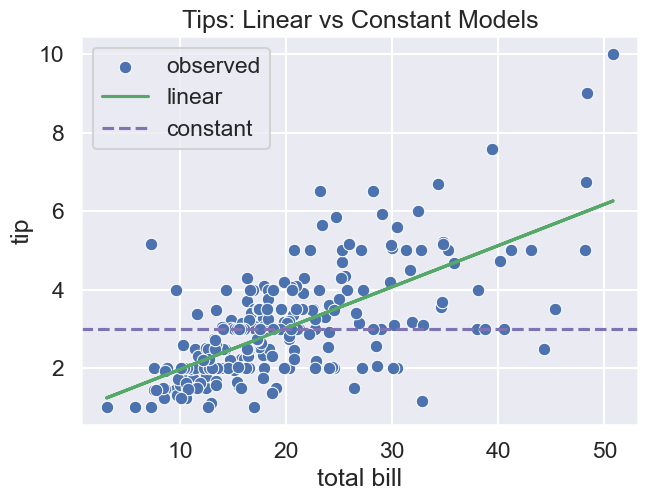

In [116]:
sns.scatterplot(x = x_total_bills, y = y_tips, label='observed');

# the below plot expects you've run all of Question 5
plt.plot(x_total_bills, predict_tip_linear(x_total_bills), label='linear', color='g');

# the below function expects you've run the cell right before part B
plt.axhline(y=np.mean(y_tips), label='constant', color='m', ls='--');

plt.legend()
plt.xlabel("total bill")
plt.ylabel("tip")
plt.title("Tips: Linear vs Constant Models");
plt.show()

# Linear Regression

In this lab, you will review the details of linear regresison. In particular:

* Matrix formulation and solution to Ordinary Least Squares (OLS).
* `sns.lmplot` as a quick visual for Simple Linear Regression (SLR).
* `scikit-learn`, or `sklearn` for short, a real world data science tool that is more robust and flexible than analytical or `scipy.optimize` solutions. 

You will also practice interpreting residual plots (vs. fitted values) and the Multiple $R^2$ metric used in Multiple Linear Regression.

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Data Loading

For the first part, you will predict fuel efficiency (`mpg`) of several models of automobiles using a **single feature**: engine power (`horsepower`). For the second part, you will perform feature engineering on **multiple features** to better predict fuel efficiency.

First, let's load in the data.

In [117]:
# Here, we load the fuel dataset, and drop any rows that have missing data.
vehicle_data = pd.read_csv('mpg.csv').dropna()
vehicle_data = vehicle_data.sort_values('horsepower', ascending=True)
vehicle_data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan
1,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle
2,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
3,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
4,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel


In [118]:
vehicle_data.shape

(392, 9)

We have 392 datapoints and 8 potential features (plus our observations, `mpg`).

Let us try to fit a line to the below plot, which shows `mpg` vs. `horsepower` for several models of automobiles.

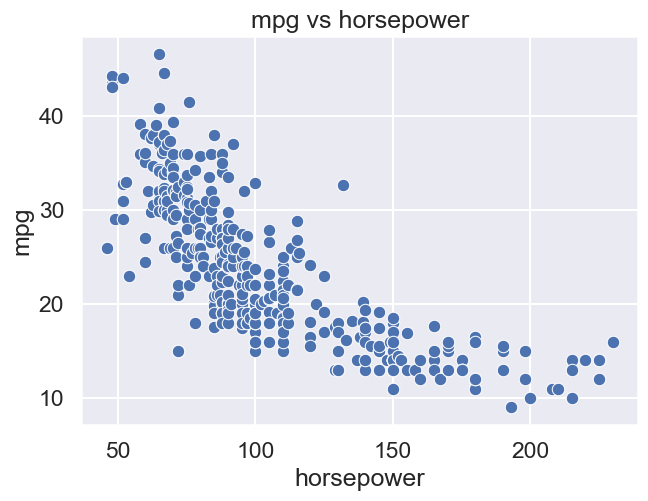

In [119]:
# Run this cell to visualize the data. 
sns.scatterplot(x = 'horsepower', y = 'mpg', data = vehicle_data);
plt.title("mpg vs horsepower");

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

## Question 1: Ordinary Least Squares

Instead of using the SLR formulation, in this lab we will practice linear algebra with Ordinary Least Squares. Recall that the Simple Linear Regression model is written as follows:

$$\hat{y} = \theta_0 + \theta_1 x$$

We now use $\theta = [\theta_0, \theta_1]$ so that the formulation more closely matches our multiple linear regression model:

$$\hat{y} = \theta_0 + \theta_1 x_1 + \dots + \theta_p x_p$$

We can rewrite our multiple linear regression model using matrix notation. Let $\mathbb{Y}$ be a vector of all $n$ observations in our sample. Then our prediction vector $\hat{\mathbb{Y}}$ is:

$$\Large \hat{\mathbb{Y}} = \mathbb{X} \theta$$

where $\mathbb{X} \in \mathbb{R}^{n\times p}$ is the **design matrix** representing the $p$ features for all $n$ datapoints in our sample.

Note that for our SLR model, $p = 1$ and therefore the matrix notation seems rather silly. Nevertheless it is valuable to start small and build on our intuition.

<br><br>

---

### Question 1a: Construct $\mathbb{X}$ with an intercept term

Because we have an intercept term $\theta_0$ in our parameter vector $\theta$, we need to augment our design matrix $\mathbb{X}$ with one all-ones column and hence the dimensionality of the design matrix after augmentation will be:

$$ \Large \mathbb{X} \in \mathbb{R}^{n \times (p + 1)}$$

Therefore, the resulting matrix expression $\hat{\mathbb{Y}} = \mathbb{X} \theta$ represents $n$ linear equations, where equation $i$ is $\hat{y_i} = \theta_0 \cdot 1 + \theta_1 \cdot x_{i1} + \dots + \theta_p x_{ip}$ where $x_{ij}$ is the $j^{th}$ feature of the $i^{th}$ datapoint. The constant all-ones column of $\mathbb{X}$ is sometimes called the bias feature; $\theta_0$ is frequently called the **bias or intercept term**.

<br/>

Below, implement `add_intercept`, which computes a design matrix such that the first (left-most) column is all ones. The function has two lines: you are responsible for constructing the all-ones column `bias_feature` using the `np.ones` ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.ones.html?highlight=ones)). This is then piped into a call to `np.concatenate` ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html)), which we've implemented for you.

Note: `bias_feature` should be a matrix of dimension `(n,1)`, not a vector of dimension `(n,)`.


In [120]:
def add_intercept(X):
    """
    Return X with a bias feature.
    
    Parameters
    -----------
    X: a 2D dataframe of p numeric features
    (may also be a 2D numpy array) of shape n x p
    
    Returns
    -----------
    A 2D matrix of shape n x (p + 1), where the leftmost
    column is a column vector of 1's
    """
    bias_feature = np.ones((X.shape[0], 1))
    return np.concatenate([bias_feature, X], axis=1)

# Note the [[ ]] brackets below: the argument needs to be
# a matrix (DataFrame), as opposed to a single array (Series).
X = add_intercept(vehicle_data[['horsepower']])
X.shape

(392, 2)

<br><br>

---
### Question 1b: Define the OLS Model

The predictions for all $n$ points in our data are (note $\theta = [\theta_0, \theta_1, \dots, \theta_p]$) :
$$ \Large \hat{\mathbb{Y}} = \mathbb{X}\theta $$

Below, implement the `linear_model` function to evaluate this product.

**Hint**: You can use `np.dot` ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)), `pd.DataFrame.dot` ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dot.html)), or the `@` operator to multiply matrices/vectors. However, while the `@` operator can be used to multiply `numpy` arrays, it generally will not work between two `pandas` objects, so keep that in mind when computing matrix-vector products!



In [121]:
def linear_model(thetas, X):
    """
    Return the linear combination of thetas and features as defined above.
    
    Parameters
    -----------
    thetas: a 1D vector representing the parameters of our model ([theta0, theta1, ...])
    X: a 2D dataframe of numeric features (may also be a 2D numpy array)
    
    Returns
    -----------
    A 1D vector representing the linear combination of thetas and features as defined above.
    """
    return np.dot(thetas, X)

<br><br>

---

### Question 1c: Least Squares Estimate, Analytically

Recall from lecture that Ordinary Least Squares is when we fit a linear model with mean squared error, which is equivalent to the following optimization problem:

$$\Large \min_{\theta} ||\Bbb{X}\theta - \Bbb{Y}||^2$$

We showed in Lecture that the optimal estimate $\hat{\theta}$ when $X^TX$ is invertible is given by the equation:

$$ \Large \hat{\theta} = (\Bbb{X}^T\Bbb{X})^{-1}\Bbb{X}^T\Bbb{Y}$$

Below, implement the analytic solution to $\hat{\theta}$ using `np.linalg.inv` ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)) to compute the inverse of $\Bbb{X}^T\Bbb{X}$.

Reminder: To compute the transpose of a matrix, you can use `X.T` or `X.transpose()` ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)).

Note: You can also consider using `np.linalg.solve` ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html)) instead of `np.linalg.inv` because it is more robust (more on StackOverflow [here](https://stackoverflow.com/questions/31256252/why-does-numpy-linalg-solve-offer-more-precise-matrix-inversions-than-numpy-li)). 


In [122]:
def get_analytical_sol(X, y):
    """
    Computes the analytical solution to our
    least squares problem
    
    Parameters
    -----------
    X: a 2D dataframe (or numpy array) of numeric features
    y: a 1D vector of outputs
    
    Returns
    -----------
    The estimate for theta (a 1D vector) computed using the
    equation mentioned above.
    """
    X_transpose = X.T
    X_transpose_X_inv = np.linalg.inv(X_transpose.dot(X))
    analytical_thetas = X_transpose_X_inv.dot(X_transpose).dot(y)
    return analytical_thetas

Y = vehicle_data['mpg']
analytical_thetas = get_analytical_sol(X, Y)
analytical_thetas

array([39.93586102, -0.15784473])

<br/><br/>

Now, let's analyze our model's performance. Your task will be to interpret the model's performance using the two visualizations and one performance metric we've implemented below.

First, we run `sns.lmplot`, which will both provide a scatterplot of `mpg` vs `horsepower` and display the least-squares line of best fit. (If you'd like to verify the OLS fit you found above is the same line found through Seaborn, change `include_OLS` to `True`.)

ValueError: shapes (2,) and (392,2) not aligned: 2 (dim 0) != 392 (dim 0)

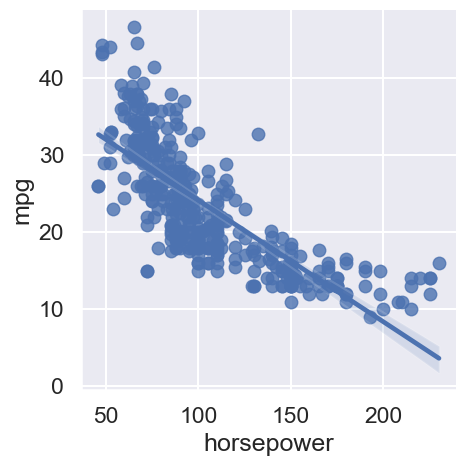

In [123]:
include_OLS = False # Change this flag to visualize OLS fit

sns.lmplot(x = 'horsepower', y = 'mpg', data = vehicle_data);
predicted_mpg_hp_only = linear_model(analytical_thetas, X)
if include_OLS:
    # if flag is on, add OLS fit as a dotted red line
    plt.plot(vehicle_data['horsepower'], predicted_mpg_hp_only, 'r--')
plt.title("mpg vs horsepower");

Next, we **plot the residuals.** While in Simple Linear Regression we have the option to plot residuals vs. the single input feature, in Multiple Linear Regression we often plot residuals vs fitted values $\hat{\mathbb{Y}}$. In this lab, we opt for the latter.

In [124]:
plt.scatter(predicted_mpg_hp_only, Y - predicted_mpg_hp_only)
plt.axhline(0, c='black', linewidth=1)
plt.xlabel(r'Fitted Values $\hat{\mathbb{Y}}$')
plt.ylabel(r'Residuals $\mathbb{Y} - \hat{\mathbb{Y}}$');
plt.title("Residual plot");

NameError: name 'predicted_mpg_hp_only' is not defined

Finally, we compute the the **correlation r** and **Multiple $R^2$** metric. As described in Lecture 12 ([link](https://docs.google.com/presentation/d/1f8Qoj1SPft2jHrusP83TGhJoz3dHJnp4fPBn5j9veMY/edit#slide=id.g1163459c7f0_0_86)),

$$R^2 = \frac{\text{variance of fitted values}}{\text{variance of true } y} = \frac{\sigma_{\hat{y}}^2}{\sigma_y^2}$$

$R^2$  can be used
in the multiple regression setting, whereas $r$ (the correlation coefficient) is restricted to SLR since it depends on a single input feature.  In SLR, $r^{2}$ and Multiple $R^{2}$ are
equivalent; the proof is left to you.

In [125]:
r_hp_only = np.corrcoef(X[:, 1], Y)[0, 1]
r2_hp_only = r_hp_only ** 2
R2_hp_only = np.var(predicted_mpg_hp_only) / np.var(Y)

print('Correlation, r, using only horsepower: ', r_hp_only)
print('Correlation squared, r^2, using only horsepower: ', r2_hp_only)
print('Multiple R^2 using only horsepower: ', r2_hp_only)

NameError: name 'predicted_mpg_hp_only' is not defined

<br><br>

---
### Question 1d

In the cell below, comment on the above visualization and performance metrics, and whether `horsepower` and `mpg` have a good linear fit.


_Type your answer here, replacing this text._

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

## Question 2: Transform a Single Feature

The Tukey-Mosteller Bulge Diagram tells us to transform our $\mathbb{X}$ or $\mathbb{Y}$ to find a linear fit.

Let's consider the following linear model:

$$\text{predicted mpg} = \theta_0 + \theta_1 \sqrt{\text{horsepower}}$$

### Introduction to `sklearn`

Another way to fit a linear regression model is to use `scikit-learn`, an industry standard package for machine learning applications. Because it is application-specific, `sklearn` is often faster and more robust than the analytical or `scipy`-based computation methods we've used thus far. Note that `scikit-learn` and `sklearn` refers to the same package, but it can only be imported under the name `sklearn`. We will use these two names interchangeably in this class.

To use `sklearn`:

1. Create an `sklearn` object.
1. `fit` the object to data.
1. Analyze fit or call `predict`.

##### **1. Create object.** 

We first create a `LinearRegression` object. Here's the sklearn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Note that by default, the object will include an intercept term when fitting.

Here, `model` is like a "blank slate" for a linear model.

In [127]:
# 1. Run this cell to initialize an sklearn LinearRegression object.
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

##### **2. `fit` the object to data.** 

Now, we need to tell `model` to "fit" itself to the data. Essentially, this is doing exactly what you did in the previous part of this lab (creating a risk function and finding the parameters that minimize that risk).

**Note**: `X` needs to be a matrix (or `DataFrame`), as opposed to a single array (or `Series`). This is because `sklearn.linear_model` is robust enough to be used for multiple regression, which we will look at later this lab.

In [128]:
# 2. Run this cell to add sqrt(hp) column for each car in the dataset.
vehicle_data['sqrt(hp)'] = np.sqrt(vehicle_data['horsepower'])
vehicle_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,sqrt(hp)
0,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan,6.782330
1,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle,6.782330
2,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel),6.928203
3,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel),6.928203
4,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel,6.928203


In [129]:
# 2. Run this cell to fit the model to the data.
model.fit(X = vehicle_data[['sqrt(hp)']], y = vehicle_data['mpg'])

LinearRegression()

##### **3. Analyze fit.** 

Now that the model exists, we can look at the $\hat{\theta}_0$ and $\hat{\theta}_1$ values it found, which are given in the attributes `intercept` and `coef`, respectively.

In [130]:
model.intercept_

58.705172037217466

In [131]:
model.coef_

array([-3.50352375])

Call `predict`.** To use the `sklearn` linear regression model to make predictions, you can use the `model.predict` method.

Below, we find the estimated `mpg` for a single datapoint with a `sqrt(hp)` of 6.78 (i.e., horsepower 46).

Note that unlike the linear algebra approach, we do not need to manually add an intercept term, because our `model` (which was created with `fit_intercept=True`) will auto-add one.

**Note:** You may recieve a user warnings about missing feature names. This is due to the fact that we fitted on the feature DataFrame `vehicle_data[['sqrt(hp)']]` with feature names `"sqrt(hp)"` but only pass in a simple 2D arrays for prediction. To avoid this, we can convert our 2D array into a DataFrame with the matching feature name.

In [132]:
# Needs to be a 2D array since the X in step 2 was 2-dimensional.
single_datapoint = [[6.78]]
# Uncomment the following to see the result of predicting on a DataFrame instead of 2D array.
#single_datapoint = pd.DataFrame([[6.78]], columns = ['sqrt(hp)']) # 
model.predict(single_datapoint) 

c:\Users\johnn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([34.95128104])

<br><br>

---

### Question 2b

Using the model defined above, set `predicted_mpg` to the predicted `mpg` for the data below. Running the cell will then compute the multiple $R^2$ value and create a linear regression plot for this new square root feature, overlaid on the original least squares estimate (used in Question 1c).

In [133]:
predicted_mpg_hp_sqrt = ...

# Do not modify below this line.
r2_hp_sqrt = np.var(predicted_mpg_hp_sqrt) / np.var(vehicle_data['mpg'])
print('Multiple R^2 using sqrt(hp): ', r2_hp_sqrt)

sns.lmplot(x = 'horsepower', y = 'mpg', data = vehicle_data)
plt.plot(vehicle_data['horsepower'],  predicted_mpg_hp_sqrt,
         color = 'r', linestyle='--', label='sqrt(hp) fit');
plt.title("mpg vs horsepower")
plt.legend();

TypeError: unsupported operand type(s) for /: 'ellipsis' and 'int'

The visualization shows a slight improvement, but note that the underlying pattern is parabolic--suggesting that perhaps we should try a quadratic feature. Next, we use the power of multiple linear regression to **add an additional feature.**

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

## Add an Additional Feature

For the second part of this lab, we move from SLR to multiple linear regression.

Until now, we have established relationships between one independent explanatory variable and one response variable. However, with real-world problems you will often want to use **multiple features** to model and predict a response variable. Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to the observed data.

We can consider including functions of existing features as **new features** to help improve the predictive power of our model. (This is something we will discuss in further detail in the Feature Engineering lecture.)

The cell below adds a column which contains the square of the horsepower for each car in the dataset.

In [134]:
# Run this cell to add a column of horsepower squared, no further action needed.
vehicle_data['hp^2'] = vehicle_data['horsepower'] ** 2
vehicle_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,sqrt(hp),hp^2
0,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan,6.782330,2116.0
1,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle,6.782330,2116.0
2,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel),6.928203,2304.0
3,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel),6.928203,2304.0
4,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel,6.928203,2304.0


<br><br>

---
## Question 3

### Question 3a

Using sklearn's `LinearRegression`, create and fit a model that tries to predict `mpg` from `horsepower` AND `hp^2` using the DataFrame `vehicle_data`. Name your model `model_multi`.

**Hint**: It should follow similar format as Question 2.
**Note**: You must create a new model again using LinearRegression(), otherwise the old model will be overwritten. If you are unsure why this happen, please review [object oriented programing](https://cs61a.org/study-guide/objects/) from CS61A.

In [137]:
from sklearn.linear_model import LinearRegression

model_multi = LinearRegression()  # Create a new instance of LinearRegression
X_multi = vehicle_data[['horsepower', 'hp^2']]
Y = vehicle_data['mpg']
model_multi.fit(X_multi, Y)  # Fit the model using X_multi and Y

LinearRegression()

After fitting, we can see the coefficients and intercept. Note, there are now two elements in `model_multi.coef_`, since there are two features.

In [138]:
model_multi.intercept_

56.90009970211301

In [139]:
model_multi.coef_

array([-0.46618963,  0.00123054])

<br/><br/>

The plot below shows the prediction of our model. It's much better!

Multiple R^2 using both horsepower and horsepower squared:  0.6875590305127545


NameError: name 'predicted_mpg_hp_only' is not defined

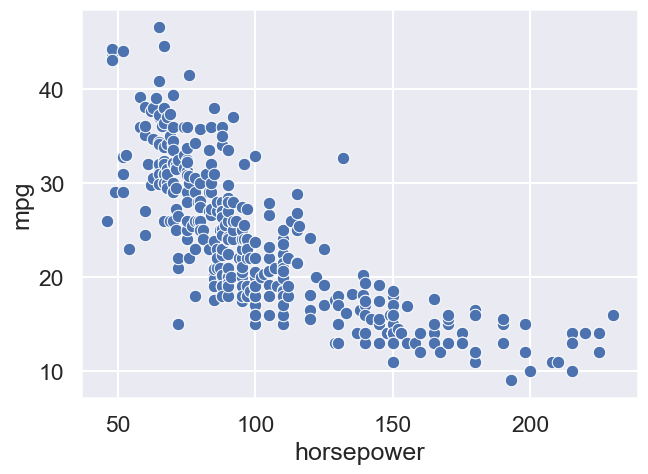

In [140]:
# Run this cell to show the prediction of our model.
predicted_mpg_multi = model_multi.predict(vehicle_data[['horsepower', 'hp^2']])
r2_multi = np.var(predicted_mpg_multi) / np.var(vehicle_data['mpg'])
print('Multiple R^2 using both horsepower and horsepower squared: ', r2_multi)

sns.scatterplot(x = 'horsepower', y = 'mpg', data = vehicle_data)
plt.plot(vehicle_data['horsepower'],  predicted_mpg_hp_only, label='hp only');
plt.plot(vehicle_data['horsepower'],  predicted_mpg_hp_sqrt, color = 'r', linestyle='--', label='sqrt(hp) fit');
plt.plot(vehicle_data['horsepower'],  predicted_mpg_multi, color = 'gold', linewidth=2, label='hp and hp^2');
plt.title("mpg vs horsepower")
plt.legend();